In [6]:
from __future__ import print_function, division

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
from bs4 import BeautifulSoup

In [9]:
import requests

In [10]:
import re


In [11]:
import sys
reload(sys)
sys.setdefaultencoding('utf-8')

In [ ]:
#don't need to run again
headers = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_5)'}
count=1
for i in range(1,21):
    url = "http://www.boxofficemojo.com//genres/chart/?view=main&sort=gross&order=DESC&pagenum={}&id=foreign.htm".format(i)
    resp = requests.get(url, headers=headers)
    file_name = "foreignfilms_{}.html".format(count)
    if resp.ok:
        soup = BeautifulSoup(resp.text, 'lxml')
    with open(file_name, 'w') as f:
        f.write(resp.text.encode("utf-8"))
    count+=1
    import time
    time.sleep(np.random.random())   

In [ ]:
#don't need to run again
count=1
movie_links=[]
for i in range(1,21):
    soup=BeautifulSoup(open("foreignfilms_{}.html".format(count)).read())
    for link in soup.findAll('a',href = re.compile('/movies/\?*id=')):
        movie_links.append("http://www.boxofficemojo.com{}".format(link['href']))
    count+=1

In [ ]:
# count = 1
# movies = []
# for i in range(1,21):
#     soup = BeautifulSoup(open("foreignfilms_{}.html".format(count)).read())
#     atags = soup.find_all("a")
#     for tag in atags:
#         if tag["href"].startswith("/movies/?id="):
#             title = tag.text
#             tag_text = str(tag.parent)  # Tag into a string
#             begin = tag_text.find("<br/>")
#             end = tag_text.find("</font>")
#             if begin != -1 and end > begin:
#                 country = tag_text[begin+6:end-1]
#             else:
#                 country = np.nan
#             movies.append({
#                 "title": title,
#                 "country": country
#             })
#     count+=1

In [ ]:
# movies_df = pd.DataFrame(movies)
# movies_df.drop_duplicates(subset='title',inplace=True)
# movies_df

In [ ]:
#don't need to run again
headers = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_5)'}
count=1
for i in movie_links:
    url = i
    resp = requests.get(url, headers=headers)
    file_name = "foreignfilms_moredetails{}.html".format(count)
    if resp.ok:
        soup = BeautifulSoup(resp.text, 'lxml')
    with open(file_name, 'w') as f:
        f.write(resp.text.encode("utf-8"))
    count+=1
    import time
    time.sleep(np.random.random())
    

In [ ]:
#don't need to run again
def get_movie_value(soup, field_name):
    obj = soup.find(text=re.compile(field_name))
    if not obj:
        return None
    next_sibling = obj.findNextSibling()
    next_sibling
    if next_sibling:
        return next_sibling.text
    else:
        return None

In [ ]:
#don't need to run again
import dateutil.parser
def to_date_year(datestring):
    try:
        date_year = dateutil.parser.parse(datestring).year
        return int(date_year)
    except:
        return None

def to_date_month(datestring):
    try:
        date_month = dateutil.parser.parse(datestring).month
        return int(date_month)
    except:
        return None

def money_to_int(moneystring):
    try:
        moneystring = moneystring.replace('$','').replace(',','').replace('million', '000000'). replace(" ", "")
        return moneystring
    except:
        return None

def runtime_to_minutes(runtimestring):
    try:
        runtime = runtimestring.split()
        minutes = int(runtime[0])*60 + int(runtime[2])
        return minutes
    except:
        return None


In [ ]:
#don't need to run again
count = 1
movies_data = []
for i in range(1,2233):
    soup = BeautifulSoup(open("foreignfilms_moredetails{}.html".format(count)).read())
                         
    title_string=soup.find('title').text
    title = title_string.split('(')[0].strip()
    try:
        widest_release = re.sub('^.', '', soup.find(text=re.compile("Widest\xa0Release:")).fetchParents()[1].findChildren()[1].text).split(" ")[0].replace(",", "")
    except: 
        widest_release = None
    mpaa_rating = get_movie_value(soup, "MPAA Rating")
    
    distributor = get_movie_value(soup, "Distributor")
    
    #raw_production_budget = get_movie_value(soup, "Production Budget")
    #production_budget = money_to_int(raw_production_budget)
    #not enough values for production budget
    
    raw_runtime=get_movie_value(soup, 'Runtime')
    runtime=runtime_to_minutes(raw_runtime)
    
    raw_release_date=get_movie_value(soup, "Release Date")
    release_date_year=to_date_year(raw_release_date)
    release_date_month=to_date_month(raw_release_date)
    
    headers = ['title', 'widest release', 'MPAA rating', 'distributor', 'runtime (mins)', 'release year', 'release month']
    movie_dict=dict(zip(headers, [title, widest_release, mpaa_rating, distributor, runtime, release_date_year, release_date_month]))
    movies_data.append(movie_dict)
    count+=1
movies_datadf=pd.DataFrame(movies_data)
movies_datadf.drop_duplicates(subset='title', inplace=True)
movies_datadf

In [ ]:
#don't need to run again
movies_datadf.dropna(inplace=True)
movies_datadf.reset_index()

In [ ]:
#don't need to run again
movies_datadf = movies_datadf[['widest release', 'title', 'distributor', 'MPAA rating','runtime (mins)', 'release year', 'release month']]


In [ ]:
# pd.merge(df_new, df_n, on='subject_id')

#movies_allinfo.merge(movies_datadf, movies_df, on='title')
# movies_allinfo=movies_datadf.merge(pd.DateFrame(movies_df))
# movies_allinfo = movies_allinfo[['title', 'country', 'MPAA rating', 'distributor', 'release month', 'release year', 'runtime (mins)']]
# movies_allinfo

In [ ]:
#don't need to run again
import json
import requests
response_dicts=[]
s=movies_datadf['release year'].values
for i,row in enumerate(movies_datadf['title']):
    t =row.split()
    t ="+".join(t)
    s_yr=s[i]
    url = "http://www.omdbapi.com/?t={}&y={}&plot=short&r=json".format(int(s_yr))
    response = requests.get(url)
    if response.status_code == 200:
        response_data = response.json()
        if response_data['Response']=='False': 
                url = "http://www.omdbapi.com/?t={}&y=&plot=short&r=json".format(t.encode("utf-8"))
                response = requests.get(url)
                if response.status_code == 200:
                    response_data = response.json()
                    response_dicts.append(response_data)
                else:
                    continue
        else: 
            response_dicts.append(response_data)
    else:
        continue
df=pd.DataFrame(response_dicts)
df_countries=df[['Title','Country']]

In [ ]:
#don't need to run again
df_countries

In [ ]:

#don't need to run again
df_countries.dropna(inplace=True)

In [ ]:
#don't need to run again
df_countries.info()

In [ ]:
#don't need to run again
df_countries['CountryFirst'] = df_countries['Country'].map(lambda x: x.split(',')[0])
df_countries.reset_index()



In [ ]:
#don't need to run again
df_countries.rename(columns={'Title':'title'}, inplace=True)

In [ ]:
#don't need to run again
df_countries.reset_index()

In [ ]:
#don't need to run again
df_countries1=df_countries.loc[df_countries.CountryFirst!='USA',]

In [ ]:
# movies_allinfo1 = movies_allinfo.merge(pd.DataFrame(df_countries), how='inner', on='title')
# movies_allinfo = movies_allinfo[['title', 'country', 'MPAA rating', 'distributor', 'release month', 'release year', 'runtime (mins)']]
#don't need to run again

movies_allinfo1=pd.merge(df_countries1, movies_datadf, on='title')

In [ ]:
#don't need to run again
movies_allinfo1.dropna(inplace=True)

In [ ]:
#don't need to run again
movies_allinfo1= movies_allinfo1.drop("Country", 1)

# df = df.drop('column_name', 1)

In [ ]:
#don't need to run again
movies_allinfo1.to_pickle('movies_data.pkl')

#df = pd.read_pickle(file_name)

In [12]:
#start run again
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import RidgeCV

In [13]:
import seaborn as sns
from seaborn import plt

In [14]:
movies_allinfo1 = pd.read_pickle('movies_data.pkl')
movies_allinfo1

,title,CountryFirst,MPAA rating,distributor,release month,release year,runtime (mins),widest release
0,Miss Peregrine's Home for Peculiar Children,UK,PG-13,Fox,9.0,2016.0,127.0,3522
1,"Crouching Tiger, Hidden Dragon",Taiwan,PG-13,Sony Classics,12.0,2000.0,120.0,2027
2,Life Is Beautiful,Italy,PG-13,Miramax,10.0,1998.0,116.0,1136
3,Instructions Not Included,Mexico,PG-13,Lionsgate,8.0,2013.0,115.0,978
4,Pan's Labyrinth,Spain,R,Picturehouse,12.0,2006.0,112.0,1143
5,Like Water for Chocolate,Mexico,R,Miramax,2.0,1993.0,105.0,64
6,Kung Fu Hustle,Hong Kong,R,Sony Classics,4.0,2005.0,95.0,2503
7,The Motorcycle Diaries,Argentina,R,Focus Features,9.0,2004.0,126.0,272
8,Iron Monkey,Hong Kong,PG-13,Miramax,10.0,2001.0,85.0,1235
9,Monsoon Wedding,India,R,USA Films,2.0,2002.0,114.0,254


In [15]:
cols = list(movies_allinfo1)
cols.insert(0,cols.pop(cols.index('widest release')))
cols


['widest release',
 'title',
 'CountryFirst',
 'MPAA rating',
 'distributor',
 'release month',
 'release year',
 'runtime (mins)']

In [16]:
# movies_allinfo12=[movies_allinfo1[['widest release', 'title','CountryFirst', 'MPAA rating', 'distributor', 'release month', 'release year', 'runtime (mins)']]]
movies_allinfo12 = movies_allinfo1.ix[:, cols]
movies_allinfo12

,widest release,title,CountryFirst,MPAA rating,distributor,release month,release year,runtime (mins)
0,3522,Miss Peregrine's Home for Peculiar Children,UK,PG-13,Fox,9.0,2016.0,127.0
1,2027,"Crouching Tiger, Hidden Dragon",Taiwan,PG-13,Sony Classics,12.0,2000.0,120.0
2,1136,Life Is Beautiful,Italy,PG-13,Miramax,10.0,1998.0,116.0
3,978,Instructions Not Included,Mexico,PG-13,Lionsgate,8.0,2013.0,115.0
4,1143,Pan's Labyrinth,Spain,R,Picturehouse,12.0,2006.0,112.0
5,64,Like Water for Chocolate,Mexico,R,Miramax,2.0,1993.0,105.0
6,2503,Kung Fu Hustle,Hong Kong,R,Sony Classics,4.0,2005.0,95.0
7,272,The Motorcycle Diaries,Argentina,R,Focus Features,9.0,2004.0,126.0
8,1235,Iron Monkey,Hong Kong,PG-13,Miramax,10.0,2001.0,85.0
9,254,Monsoon Wedding,India,R,USA Films,2.0,2002.0,114.0


In [17]:
movies_allinfo12.CountryFirst.value_counts()

India                               232
France                              204
China                                72
South Korea                          47
Italy                                46
Germany                              40
Spain                                33
Japan                                31
Hong Kong                            25
Israel                               25
Argentina                            24
UK                                   21
Mexico                               20
Brazil                               18
Sweden                               16
Denmark                              14
Iran                                 13
Taiwan                               12
Belgium                              11
Russia                               11
Norway                               10
Czech Republic                       10
Thailand                             10
Canada                                9
Hungary                               9


In [18]:
movies_allinfo12['major_country'] =  movies_allinfo12['CountryFirst'].map(lambda x: x if x in ['India', 'France', 'China', 'South Korea', 'Italy', 'Germany', 'Spain', 'Japan', 'Hong Kong', 'Israel', 'Argentina', 'UK', 'Mexico', 'Brazil', 'Sweden', 'Denmark', 'Iran', 'Taiwan', 'Belgium', 'Russia', 'Norway', 'Czech Republic', 'Thailand'] else 'Other Country')

In [19]:
movies_allinfo12

,widest release,title,CountryFirst,MPAA rating,distributor,release month,release year,runtime (mins),major_country
0,3522,Miss Peregrine's Home for Peculiar Children,UK,PG-13,Fox,9.0,2016.0,127.0,UK
1,2027,"Crouching Tiger, Hidden Dragon",Taiwan,PG-13,Sony Classics,12.0,2000.0,120.0,Taiwan
2,1136,Life Is Beautiful,Italy,PG-13,Miramax,10.0,1998.0,116.0,Italy
3,978,Instructions Not Included,Mexico,PG-13,Lionsgate,8.0,2013.0,115.0,Mexico
4,1143,Pan's Labyrinth,Spain,R,Picturehouse,12.0,2006.0,112.0,Spain
5,64,Like Water for Chocolate,Mexico,R,Miramax,2.0,1993.0,105.0,Mexico
6,2503,Kung Fu Hustle,Hong Kong,R,Sony Classics,4.0,2005.0,95.0,Hong Kong
7,272,The Motorcycle Diaries,Argentina,R,Focus Features,9.0,2004.0,126.0,Argentina
8,1235,Iron Monkey,Hong Kong,PG-13,Miramax,10.0,2001.0,85.0,Hong Kong
9,254,Monsoon Wedding,India,R,USA Films,2.0,2002.0,114.0,India


In [20]:
movies_allinfo12['MPAA rating'].value_counts()

Unrated          716
R                221
PG-13             91
PG                42
G                  5
NC-17              3
Not Yet Rated      1
Name: MPAA rating, dtype: int64

In [21]:
movies_allinfo12['MPAA_rating'] =  movies_allinfo12['MPAA rating'].map(lambda x: x if x in ['Unrated', 'R', 'PG-13', 'PG'] else 'Other MPAA Rating')

In [22]:
movies_allinfo12

,widest release,title,CountryFirst,MPAA rating,distributor,release month,release year,runtime (mins),major_country,MPAA_rating
0,3522,Miss Peregrine's Home for Peculiar Children,UK,PG-13,Fox,9.0,2016.0,127.0,UK,PG-13
1,2027,"Crouching Tiger, Hidden Dragon",Taiwan,PG-13,Sony Classics,12.0,2000.0,120.0,Taiwan,PG-13
2,1136,Life Is Beautiful,Italy,PG-13,Miramax,10.0,1998.0,116.0,Italy,PG-13
3,978,Instructions Not Included,Mexico,PG-13,Lionsgate,8.0,2013.0,115.0,Mexico,PG-13
4,1143,Pan's Labyrinth,Spain,R,Picturehouse,12.0,2006.0,112.0,Spain,R
5,64,Like Water for Chocolate,Mexico,R,Miramax,2.0,1993.0,105.0,Mexico,R
6,2503,Kung Fu Hustle,Hong Kong,R,Sony Classics,4.0,2005.0,95.0,Hong Kong,R
7,272,The Motorcycle Diaries,Argentina,R,Focus Features,9.0,2004.0,126.0,Argentina,R
8,1235,Iron Monkey,Hong Kong,PG-13,Miramax,10.0,2001.0,85.0,Hong Kong,PG-13
9,254,Monsoon Wedding,India,R,USA Films,2.0,2002.0,114.0,India,R


In [23]:
movies_allinfo12['distributor'].value_counts()

Eros                              98
Sony Classics                     89
UTV Communications                58
Strand                            54
IFC                               45
Miramax                           36
China Lion                        31
Well Go USA                       29
Music Box Films                   28
Magnolia                          27
Yash Raj                          25
Film Movement                     23
Kino                              22
Cinema Guild                      21
Kino Lorber                       21
Cohen Media Group                 20
Zeitgeist                         19
New Yorker                        15
CJ Entertainment                  14
First Run                         14
Samuel Goldwyn                    13
Reliance Big Pictures             13
Weinstein Company                 12
Orion Classics                    12
Wellspring                        11
Palm                              11
Regent Releasing                  10
T

In [24]:
movies_allinfo12['distributor1'] =  movies_allinfo12['distributor'].map(lambda x: x if x in ['Eros', 'Sony Classics', 'UTV Communications', 'Strand', 'IFC', 'Miramax', 'China Lion', 'Well Go USA', 'Music Box Films', 'Magnolia', 'Yash Raj', 'Film Movement', 'Kino', 'Cinema Guild', 'Kino Lorber', 'Cohen Media Group'] else 'Other Distributor')

In [25]:
movies_allinfo12

,widest release,title,CountryFirst,MPAA rating,distributor,release month,release year,runtime (mins),major_country,MPAA_rating,distributor1
0,3522,Miss Peregrine's Home for Peculiar Children,UK,PG-13,Fox,9.0,2016.0,127.0,UK,PG-13,Other Distributor
1,2027,"Crouching Tiger, Hidden Dragon",Taiwan,PG-13,Sony Classics,12.0,2000.0,120.0,Taiwan,PG-13,Sony Classics
2,1136,Life Is Beautiful,Italy,PG-13,Miramax,10.0,1998.0,116.0,Italy,PG-13,Miramax
3,978,Instructions Not Included,Mexico,PG-13,Lionsgate,8.0,2013.0,115.0,Mexico,PG-13,Other Distributor
4,1143,Pan's Labyrinth,Spain,R,Picturehouse,12.0,2006.0,112.0,Spain,R,Other Distributor
5,64,Like Water for Chocolate,Mexico,R,Miramax,2.0,1993.0,105.0,Mexico,R,Miramax
6,2503,Kung Fu Hustle,Hong Kong,R,Sony Classics,4.0,2005.0,95.0,Hong Kong,R,Sony Classics
7,272,The Motorcycle Diaries,Argentina,R,Focus Features,9.0,2004.0,126.0,Argentina,R,Other Distributor
8,1235,Iron Monkey,Hong Kong,PG-13,Miramax,10.0,2001.0,85.0,Hong Kong,PG-13,Miramax
9,254,Monsoon Wedding,India,R,USA Films,2.0,2002.0,114.0,India,R,Other Distributor


In [26]:
# pd.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False)
# df = pd.concat([df, pd.get_dummies(df['YEAR'])], axis=1)


In [27]:
movies_allinfo2 = pd.concat([movies_allinfo12, pd.get_dummies(movies_allinfo12['major_country'])], axis=1)

In [28]:
movies_allinfo2
movies_allinfo2.columns

Index([u'widest release',          u'title',   u'CountryFirst',
          u'MPAA rating',    u'distributor',  u'release month',
         u'release year', u'runtime (mins)',  u'major_country',
          u'MPAA_rating',   u'distributor1',      u'Argentina',
              u'Belgium',         u'Brazil',          u'China',
       u'Czech Republic',        u'Denmark',         u'France',
              u'Germany',      u'Hong Kong',          u'India',
                 u'Iran',         u'Israel',          u'Italy',
                u'Japan',         u'Mexico',         u'Norway',
        u'Other Country',         u'Russia',    u'South Korea',
                u'Spain',         u'Sweden',         u'Taiwan',
             u'Thailand',             u'UK'],
      dtype='object')

In [29]:
movies_allinfo3 = pd.concat([movies_allinfo2, pd.get_dummies(movies_allinfo2['MPAA_rating'])], axis=1)
movies_allinfo3.columns

Index([   u'widest release',             u'title',      u'CountryFirst',
             u'MPAA rating',       u'distributor',     u'release month',
            u'release year',    u'runtime (mins)',     u'major_country',
             u'MPAA_rating',      u'distributor1',         u'Argentina',
                 u'Belgium',            u'Brazil',             u'China',
          u'Czech Republic',           u'Denmark',            u'France',
                 u'Germany',         u'Hong Kong',             u'India',
                    u'Iran',            u'Israel',             u'Italy',
                   u'Japan',            u'Mexico',            u'Norway',
           u'Other Country',            u'Russia',       u'South Korea',
                   u'Spain',            u'Sweden',            u'Taiwan',
                u'Thailand',                u'UK', u'Other MPAA Rating',
                      u'PG',             u'PG-13',                 u'R',
                 u'Unrated'],
      dtype='object')

In [30]:
movies_allinfo3

,widest release,title,CountryFirst,MPAA rating,distributor,release month,release year,runtime (mins),major_country,MPAA_rating,...,Spain,Sweden,Taiwan,Thailand,UK,Other MPAA Rating,PG,PG-13,R,Unrated
0,3522,Miss Peregrine's Home for Peculiar Children,UK,PG-13,Fox,9.0,2016.0,127.0,UK,PG-13,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,2027,"Crouching Tiger, Hidden Dragon",Taiwan,PG-13,Sony Classics,12.0,2000.0,120.0,Taiwan,PG-13,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1136,Life Is Beautiful,Italy,PG-13,Miramax,10.0,1998.0,116.0,Italy,PG-13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,978,Instructions Not Included,Mexico,PG-13,Lionsgate,8.0,2013.0,115.0,Mexico,PG-13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1143,Pan's Labyrinth,Spain,R,Picturehouse,12.0,2006.0,112.0,Spain,R,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,64,Like Water for Chocolate,Mexico,R,Miramax,2.0,1993.0,105.0,Mexico,R,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,2503,Kung Fu Hustle,Hong Kong,R,Sony Classics,4.0,2005.0,95.0,Hong Kong,R,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,272,The Motorcycle Diaries,Argentina,R,Focus Features,9.0,2004.0,126.0,Argentina,R,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,1235,Iron Monkey,Hong Kong,PG-13,Miramax,10.0,2001.0,85.0,Hong Kong,PG-13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,254,Monsoon Wedding,India,R,USA Films,2.0,2002.0,114.0,India,R,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
# distributor1

movies_allinfo4 = pd.concat([movies_allinfo3, pd.get_dummies(movies_allinfo3['distributor1'])], axis=1)
movies_allinfo4 = pd.concat([movies_allinfo4, pd.get_dummies(movies_allinfo4['release month'])], axis=1)
movies_allinfo4.columns

Index([    u'widest release',              u'title',       u'CountryFirst',
              u'MPAA rating',        u'distributor',      u'release month',
             u'release year',     u'runtime (mins)',      u'major_country',
              u'MPAA_rating',       u'distributor1',          u'Argentina',
                  u'Belgium',             u'Brazil',              u'China',
           u'Czech Republic',            u'Denmark',             u'France',
                  u'Germany',          u'Hong Kong',              u'India',
                     u'Iran',             u'Israel',              u'Italy',
                    u'Japan',             u'Mexico',             u'Norway',
            u'Other Country',             u'Russia',        u'South Korea',
                    u'Spain',             u'Sweden',             u'Taiwan',
                 u'Thailand',                 u'UK',  u'Other MPAA Rating',
                       u'PG',              u'PG-13',                  u'R',
            

In [32]:
movies_allinfo4

,widest release,title,CountryFirst,MPAA rating,distributor,release month,release year,runtime (mins),major_country,MPAA_rating,...,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
0,3522,Miss Peregrine's Home for Peculiar Children,UK,PG-13,Fox,9.0,2016.0,127.0,UK,PG-13,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2027,"Crouching Tiger, Hidden Dragon",Taiwan,PG-13,Sony Classics,12.0,2000.0,120.0,Taiwan,PG-13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1136,Life Is Beautiful,Italy,PG-13,Miramax,10.0,1998.0,116.0,Italy,PG-13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,978,Instructions Not Included,Mexico,PG-13,Lionsgate,8.0,2013.0,115.0,Mexico,PG-13,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1143,Pan's Labyrinth,Spain,R,Picturehouse,12.0,2006.0,112.0,Spain,R,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,64,Like Water for Chocolate,Mexico,R,Miramax,2.0,1993.0,105.0,Mexico,R,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2503,Kung Fu Hustle,Hong Kong,R,Sony Classics,4.0,2005.0,95.0,Hong Kong,R,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,272,The Motorcycle Diaries,Argentina,R,Focus Features,9.0,2004.0,126.0,Argentina,R,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,1235,Iron Monkey,Hong Kong,PG-13,Miramax,10.0,2001.0,85.0,Hong Kong,PG-13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,254,Monsoon Wedding,India,R,USA Films,2.0,2002.0,114.0,India,R,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
movies_allinfo5=movies_allinfo4

In [34]:
movies_allinfo5 = movies_allinfo5.drop('CountryFirst', axis=1)

In [35]:
movies_allinfo5 = movies_allinfo5.drop(['MPAA rating', 'distributor', 'major_country', 'MPAA_rating'], axis=1)

In [36]:
movies_allinfo5 = movies_allinfo5.drop(['distributor1'], axis=1)

In [37]:
movies_allinfo5 = movies_allinfo5.drop(['title'], axis=1)

In [38]:
movies_allinfo5.rename(columns={1.0:'January'}, inplace=True)
movies_allinfo5.rename(columns={2.0:'February'}, inplace=True)
movies_allinfo5.rename(columns={3.0:'March'}, inplace=True)
movies_allinfo5.rename(columns={4.0:'April'}, inplace=True)
movies_allinfo5.rename(columns={5.0:'May'}, inplace=True)
movies_allinfo5.rename(columns={6.0:'June'}, inplace=True)
movies_allinfo5.rename(columns={7.0:'July'}, inplace=True)
movies_allinfo5.rename(columns={8.0:'August'}, inplace=True)
movies_allinfo5.rename(columns={9.0:'September'}, inplace=True)
movies_allinfo5.rename(columns={10.0:'October'}, inplace=True)
movies_allinfo5.rename(columns={11.0:'November'}, inplace=True)
movies_allinfo5.rename(columns={12.0:'December'}, inplace=True)

In [39]:
movies_allinfo5.rename(columns={'widest release':'widest_release'}, inplace=True)

In [40]:
movies_allinfo5 = movies_allinfo5.drop(['release month'], axis=1)

In [41]:
movies_allinfo5 = movies_allinfo5.drop(['release year'], axis=1)

In [42]:
# movies_allinfo5.corr()['widest_release'].sort_values(ascending=False)

# 'widest release'
movies_allinfo5.reset_index()

,index,widest_release,runtime (mins),Argentina,Belgium,Brazil,China,Czech Republic,Denmark,France,...,March,April,May,June,July,August,September,October,November,December
0,0,3522,127.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,2027,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,1136,116.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,978,115.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,1143,112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,5,64,105.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,6,2503,95.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,7,272,126.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,8,1235,85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,9,254,114.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
movies_allinfo5.head()

,widest_release,runtime (mins),Argentina,Belgium,Brazil,China,Czech Republic,Denmark,France,Germany,...,March,April,May,June,July,August,September,October,November,December
0,3522,127.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2027,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1136,116.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,978,115.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1143,112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [44]:
movies_allinfo5.columns

Index([    u'widest_release',     u'runtime (mins)',          u'Argentina',
                  u'Belgium',             u'Brazil',              u'China',
           u'Czech Republic',            u'Denmark',             u'France',
                  u'Germany',          u'Hong Kong',              u'India',
                     u'Iran',             u'Israel',              u'Italy',
                    u'Japan',             u'Mexico',             u'Norway',
            u'Other Country',             u'Russia',        u'South Korea',
                    u'Spain',             u'Sweden',             u'Taiwan',
                 u'Thailand',                 u'UK',  u'Other MPAA Rating',
                       u'PG',              u'PG-13',                  u'R',
                  u'Unrated',         u'China Lion',       u'Cinema Guild',
        u'Cohen Media Group',               u'Eros',      u'Film Movement',
                      u'IFC',               u'Kino',        u'Kino Lorber',
            

In [45]:
movies_allinfo5.widest_release.dtype

dtype('O')

In [46]:
movies_allinfo5['widest_release']=movies_allinfo5['widest_release'].astype(float)

# xdf['MyColumnName'] = df['MyColumnName'].astype('float64') 

In [47]:
movies_allinfo5

,widest_release,runtime (mins),Argentina,Belgium,Brazil,China,Czech Republic,Denmark,France,Germany,...,March,April,May,June,July,August,September,October,November,December
0,3522.0,127.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2027.0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1136.0,116.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,978.0,115.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1143.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,64.0,105.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2503.0,95.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,272.0,126.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,1235.0,85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,254.0,114.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
movies_allinfo5.corr()

,widest_release,runtime (mins),Argentina,Belgium,Brazil,China,Czech Republic,Denmark,France,Germany,...,March,April,May,June,July,August,September,October,November,December
widest_release,1.000000,0.046935,-0.020263,-0.019601,-0.009817,-0.005387,-0.016607,-0.018706,-0.051555,-0.028027,...,-0.023442,-0.005411,-0.048160,-0.014349,-0.022830,-0.006997,0.031199,0.018968,0.009265,0.116572
runtime (mins),0.046935,1.000000,-0.055188,-0.014858,-0.039880,-0.021795,-0.025982,-0.035664,-0.182895,-0.034296,...,-0.037742,-0.054900,-0.065173,0.021068,-0.020983,0.039104,0.049534,-0.005814,0.037215,0.046157
Argentina,-0.020263,-0.055188,1.000000,-0.015307,-0.019645,-0.040330,-0.014588,-0.017293,-0.072827,-0.029594,...,0.037188,0.033457,0.002551,-0.048734,-0.003462,-0.029016,-0.002024,-0.017399,0.012607,-0.017399
Belgium,-0.019601,-0.014858,-0.015307,1.000000,-0.013219,-0.027137,-0.009816,-0.011636,-0.049003,-0.019913,...,-0.032792,-0.033846,0.004571,-0.001257,0.032614,0.058933,-0.031351,-0.028133,-0.026320,0.043545
Brazil,-0.009817,-0.039880,-0.019645,-0.013219,1.000000,-0.034828,-0.012598,-0.014934,-0.062891,-0.025556,...,0.007381,0.004782,-0.011227,0.007381,-0.040936,0.005206,-0.040237,-0.036107,0.055555,-0.036107
China,-0.005387,-0.021795,-0.040330,-0.027137,-0.034828,1.000000,-0.025862,-0.030658,-0.129111,-0.052465,...,-0.022929,-0.002557,0.004523,-0.010235,-0.045088,-0.026590,0.035919,0.012434,-0.008215,0.012434
Czech Republic,-0.016607,-0.025982,-0.014588,-0.009816,-0.012598,-0.025862,1.000000,-0.011089,-0.046701,-0.018977,...,-0.031251,-0.032256,-0.028283,0.067925,-0.030398,0.064990,0.004418,0.010759,-0.025084,-0.026812
Denmark,-0.018706,-0.035664,-0.017293,-0.011636,-0.014934,-0.030658,-0.011089,1.000000,-0.055361,-0.022496,...,-0.009054,0.016337,-0.033528,-0.009054,0.021228,0.016760,-0.035419,0.000029,0.003967,0.000029
France,-0.051555,-0.182895,-0.072827,-0.049003,-0.062891,-0.129111,-0.046701,-0.055361,1.000000,-0.094740,...,-0.010392,-0.003304,0.043312,-0.010392,0.038567,-0.009739,-0.006480,0.022453,0.030620,-0.023519
Germany,-0.028027,-0.034296,-0.029594,-0.019913,-0.025556,-0.052465,-0.018977,-0.022496,-0.094740,1.000000,...,-0.013099,-0.000061,0.033667,0.003667,-0.010220,0.000548,-0.008431,0.002773,0.009672,0.002773


In [49]:
movies_allinfo5

,widest_release,runtime (mins),Argentina,Belgium,Brazil,China,Czech Republic,Denmark,France,Germany,...,March,April,May,June,July,August,September,October,November,December
0,3522.0,127.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2027.0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1136.0,116.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,978.0,115.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1143.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,64.0,105.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2503.0,95.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,272.0,126.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,1235.0,85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,254.0,114.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score


In [55]:
lr = LinearRegression()
X = movies_allinfo5.iloc[:, 1:]
y = movies_allinfo5.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

lr.fit(X_train, y_train)
lr.score(X_test, y_test)

-0.012950760654455884

In [51]:
lr = LinearRegression()
X = movies_allinfo5.iloc[:, 1:]
y = movies_allinfo5.iloc[:,0]
lr = LinearRegression()
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
scores = cross_val_score(lr, X, y, cv=10, scoring = 'r2')
scores

array([  -0.28264865,   -4.59417352,   -3.15341027,   -3.2370364 ,
         -4.57499644,  -12.77315074,  -19.80664025,  -57.3452888 ,
       -112.73377461, -123.84151099])

In [53]:
scores.mean()

-34.23426306777484

In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score, train_test_split, KFold
rf1 = RandomForestRegressor(n_estimators = 1000, max_features = 59)
# X_train_rf1, X_test_rf1, y_train_rf1, y_test_rf1 = train_test_split(X, y, test_size=0.3)
# kfold = KFold(len(X_train_rf), n_folds=10, shuffle=True)
# rf1.fit(X, y)
# rf2.score(X_test_rf1, y_test_rf1)
scores = cross_val_score(rf1, X, y, cv=10, scoring = 'r2')
scores.mean()

-31.717599303236277

In [ ]:
# import statsmodels.formula.api as smf

In [56]:
movies_allinfo5.columns

Index([    u'widest_release',     u'runtime (mins)',          u'Argentina',
                  u'Belgium',             u'Brazil',              u'China',
           u'Czech Republic',            u'Denmark',             u'France',
                  u'Germany',          u'Hong Kong',              u'India',
                     u'Iran',             u'Israel',              u'Italy',
                    u'Japan',             u'Mexico',             u'Norway',
            u'Other Country',             u'Russia',        u'South Korea',
                    u'Spain',             u'Sweden',             u'Taiwan',
                 u'Thailand',                 u'UK',  u'Other MPAA Rating',
                       u'PG',              u'PG-13',                  u'R',
                  u'Unrated',         u'China Lion',       u'Cinema Guild',
        u'Cohen Media Group',               u'Eros',      u'Film Movement',
                      u'IFC',               u'Kino',        u'Kino Lorber',
            

In [57]:


# #
# #release year - X2
# #runtime(mins) - X3
# #MPAA Rating - X4-X8
# #Country - X9-X31
# #Distributors - X32 - X48
# #Months - X49 - X60
# Y = movies_allinfo5['widest_release']

# X3 = movies_allinfo5['runtime (mins)']
# X4 = movies_allinfo5['PG-13']
# X5 = movies_allinfo5['R']
# X6 = movies_allinfo5['PG']
# X7 = movies_allinfo5['Unrated']
# X8 = movies_allinfo5['Other MPAA Rating']
# X9 = movies_allinfo5['Argentina']
# X10 = movies_allinfo5['Belgium']
# X11 = movies_allinfo5['Brazil']
# X12 = movies_allinfo5['China']
# X13 = movies_allinfo5['Czech Republic']
# X14 = movies_allinfo5['Denmark']
# X15 = movies_allinfo5['France']
# X16 = movies_allinfo5['Germany']
# X17 = movies_allinfo5['Hong Kong']
# X18 = movies_allinfo5['India']
# X19 = movies_allinfo5['Iran']
# X20 = movies_allinfo5['Israel']
# X21 = movies_allinfo5['Italy']
# X22 = movies_allinfo5['Japan']
# X22 = movies_allinfo5['Mexico']
# X23 = movies_allinfo5['Norway']
# X24 = movies_allinfo5['Other Country']
# X25 = movies_allinfo5['Russia']
# X26 = movies_allinfo5['South Korea']
# X27 = movies_allinfo5['Spain']
# X28 = movies_allinfo5['Sweden']
# X29 = movies_allinfo5['Taiwan']
# X30 = movies_allinfo5['Thailand']
# X31 = movies_allinfo5['UK']
# X32 = movies_allinfo5['China Lion']
# X33 = movies_allinfo5['Cinema Guild']
# X34 = movies_allinfo5['Cohen Media Group']
# X35 = movies_allinfo5['Eros']
# X36 = movies_allinfo5['Film Movement']
# X37 = movies_allinfo5['IFC']
# X38 = movies_allinfo5['Kino']
# X39 = movies_allinfo5['Kino Lorber']
# X40 = movies_allinfo5['Magnolia']
# X41 = movies_allinfo5['Miramax']
# X42 = movies_allinfo5['Music Box Films']
# X43 = movies_allinfo5['Other Distributor']
# X44 = movies_allinfo5['Sony Classics']
# X45 = movies_allinfo5['Strand']
# X46 = movies_allinfo5['UTV Communications']
# X47 = movies_allinfo5['Well Go USA']
# X48 = movies_allinfo5['Yash Raj']
# X49 = movies_allinfo5['January']
# X50 = movies_allinfo5['February']
# X51 = movies_allinfo5['March']
# X52 = movies_allinfo5['April']
# X53 = movies_allinfo5['May']
# X54 = movies_allinfo5['June']
# X55 = movies_allinfo5['July']
# X56 = movies_allinfo5['August']
# X57 = movies_allinfo5['September']
# X58 = movies_allinfo5['October']
# X59 = movies_allinfo5['November']
# X60 = movies_allinfo5['December']

In [58]:
# lm1 = smf.ols('Y ~ X3 + X4 + X5 + X6 + X7 + X8 + X9 + X10 + X11 + X12 + X13 + X14 + X15 + X16 + X17 + X18 + X19 + X20 + X21 + X22 + X23 + X24 + X25 + X26 + X27 + X28 + X29 + X30 + X31 + X32 + X33 + X34 + X35 + X36 + X37 + X38 + X39 + X40 + X41 + X42 + X43 + X44 + X45 + X46 + X47 + X48 + X49 + X50 + X51 + X52 + X53 + X54 + X55 + X56 + X57 + X58 + X59 + X60', data=movies_allinfo5)
# fit1 = lm1.fit()
# fit1.summary()
#release year - X2  
#runtime(mins) - X3  
#MPAA Rating - X4-X8 
#Country - X9-X31
#Distributors - X32 - X48
#Months - X49 - X60



In [59]:
movies_allinfo5.widest_release.mean()

58.52548656163114

In [61]:
# %matplotlib inline
# # plt.plot(fit1.resid.reset_index().iloc[:,1], 'o', alpha=0.5)
# fit1.resid.sort_values(ascending=False)#.plot(style='o', figsize=(12,8))

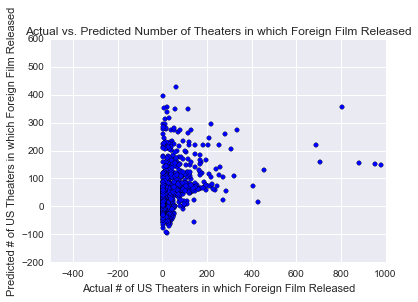

In [62]:
plt.scatter(y, lr.predict(X))
plt.xlim(xmax=1000)
plt.title("Actual vs. Predicted Number of Theaters in which Foreign Film Released")
plt.xlabel('Actual # of US Theaters in which Foreign Film Released')
plt.ylabel('Predicted # of US Theaters in which Foreign Film Released')

In [ ]:
# def RMSE(y_test, y_predict):
#    RMSE = (sum((y_predict - y_test)**2)/len(y_test))**0.5
#    return RMSE

# def plot_predict(y_test, y_predict):
#    fig, ax = plt.subplots(1, 1, figsize = (10, 5))
   
#    ax.scatter(y_test, y_predict, alpha = 0.5)
#    ax.plot(np.linspace(min(y_test), max(y_test), 2), np.linspace(min(y_test), max(y_test), 2), 'r--')
#    ax.set_xlabel('y_test', fontsize = 20)
#    ax.set_ylabel('y_predict', fontsize = 20)   
#    #ax.set_aspect("equal")
#    ax.set_title(('RMSE = ' + str(RMSE(y_test, y_predict)) + '| RSquared = ' + str(calc_RSquared(y_test, y_predict))), fontsize = 20)
#    ax.tick_params(axis='x', labelsize=20)
#    ax.tick_params(axis='y', labelsize=20)
   
# def calc_RSquared(y_test, y_predict):
#    SS_total = np.sum((y_test - np.mean(y_test))**2)
#    SS_res = np.sum((y_test - y_predict)**2)
#    return (1 - SS_res/SS_total)

In [ ]:
# # X = movies_allinfo5.iloc[:, 1:]
# # y = movies_allinfo5.iloc[:,0]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# # lr.fit(X_train, y_train)
# # lr.score(X_test, y_test)

# from sklearn.linear_model import Lasso
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.pipeline import make_pipeline



In [ ]:
# est_poly = make_pipeline(PolynomialFeatures(1), Lasso(alpha = 4))
# est_poly.fit(X_train, y_train)
# y_predict = est_poly.predict(X_test)
# # plot_predict(y_test, y_predict)
# plt.xlim(xmax=100)
# plt.ylim(ymax=400, ymin=0)
# # plt.title("Actual vs. Predicted Number of Theaters in which Foreign Film Released")
# plt.xlabel('Actual # of US Theaters in which Foreign Film Released')
# plt.ylabel('Predicted # of US Theaters in which Foreign Film Released')

In [63]:
X_train.shape

(755, 59)

In [65]:
X = movies_allinfo5.iloc[:, 1:]
y = movies_allinfo5.iloc[:,0]
lr = LinearRegression()
lr.fit(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.linear_model import LassoCV

las = LassoCV(cv=10)
las.fit(X, y)
las.score(X_test, y_test)

0.0082842243589191789

In [66]:
las.coef_

array([ 0.29551782, -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -8.8226329 ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])

In [67]:
pd.DataFrame(zip(movies_allinfo5.columns[1:], las.coef_[:])).sort_values(1, ascending=False)

,0,1
0,runtime (mins),0.295518
44,UTV Communications,0.000000
32,Cohen Media Group,-0.000000
33,Eros,0.000000
34,Film Movement,-0.000000
35,IFC,-0.000000
36,Kino,-0.000000
37,Kino Lorber,-0.000000
38,Magnolia,-0.000000
39,Miramax,0.000000


In [68]:
rcv = RidgeCV(cv=10)
rcv.fit(X, y)
rcv.score(X_test, y_test)

0.19341683151881084

In [69]:
rcv.coef_

array([  0.11845962, -28.31791726, -28.40296573,  -6.27890828,
         6.86213035, -43.92825083, -21.78102519, -19.06014577,
       -28.76071881,  91.66635155,  31.94635869, -20.03253556,
        -7.80696643,  -8.11498496, -36.68923181,  39.96921068,
       -22.35189173, -19.1971369 , -32.85647449, -21.26799754,
        22.38059889, -11.44887689,  82.27587936, -14.74292058,
        95.93841924, -18.35675386, -33.97249949,  77.24650492,
        13.70504291, -38.62229447, -25.12623721,  -4.68314328,
       -30.55872517,  12.62407893,  -7.13134122,  -2.74626932,
       -10.32943165,  -8.35327059, -29.40736776,  13.5723403 ,
         8.93355775,   5.59720348,  83.73415701,  -8.67016824,
        12.49574231, -13.31760678,   3.36648145,  -3.26126268,
       -14.17709414,  -9.00619187, -11.88418274, -21.20714357,
        -3.66344189,  -8.59334475,  -0.3064844 ,   8.42535869,
        13.19570208,   2.28826421,  48.18982107])

In [ ]:
# pd.DataFrame(zip(movies_allinfo5.columns[1:], rcv.coef_[:])).sort_values(1, ascending=False)

(0.0, 500)

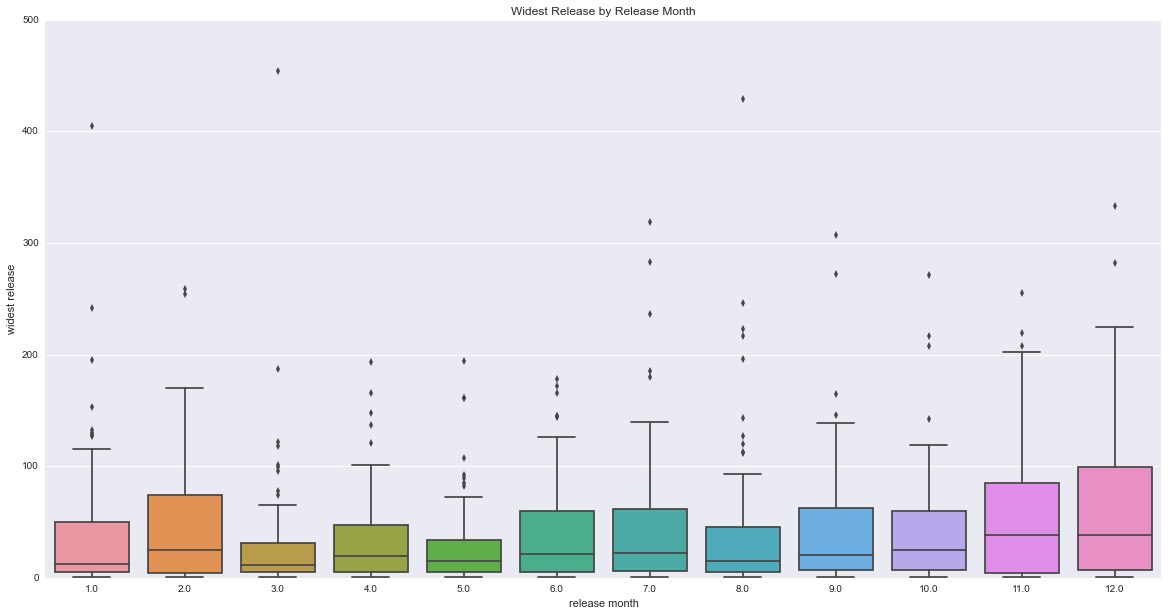

In [72]:
movies_allinfo2['widest release']=movies_allinfo2['widest release'].astype(float)
movies_allinfo2['release month']=movies_allinfo2['release month'].astype(float)




fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.set_title('Widest Release by Release Month')
sns.boxplot(x=movies_allinfo2['release month'].sort_values(), y=movies_allinfo2['widest release'])
ax.set_xlabel('release month')
ax.set_ylabel('widest release')
ax.set_ylim(top=500)

# movies_allinfo2

In [78]:
movies_allinfo5.widest_release.sort_values(ascending=False)

0       3522.0
6       2503.0
1       2027.0
70      1323.0
8       1235.0
33      1234.0
16      1189.0
4       1143.0
2       1136.0
3        978.0
96       954.0
62       881.0
32       804.0
27       707.0
10       689.0
11       454.0
38       429.0
15       405.0
30       333.0
22       319.0
42       307.0
39       283.0
28       282.0
7        272.0
98       271.0
14       259.0
19       255.0
9        254.0
207      246.0
24       242.0
         ...  
1004       1.0
1013       1.0
982        1.0
1001       1.0
1000       1.0
984        1.0
998        1.0
995        1.0
994        1.0
1012       1.0
962        1.0
1039       1.0
1028       1.0
1037       1.0
1034       1.0
1033       1.0
1032       1.0
993        1.0
950        1.0
1029       1.0
904        1.0
1019       1.0
1026       1.0
1025       1.0
954        1.0
1023       1.0
955        1.0
792        1.0
956        1.0
1078       1.0
Name: widest_release, dtype: float64

In [79]:
movie_allinfo8 = movies_allinfo5[(movies_allinfo5.widest_release<=300)]

In [80]:
movie_allinfo8

,widest_release,runtime (mins),Argentina,Belgium,Brazil,China,Czech Republic,Denmark,France,Germany,...,March,April,May,June,July,August,September,October,November,December
5,64.0,105.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,272.0,126.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,254.0,114.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,124.0,123.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,2.0,210.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,259.0,137.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,178.0,136.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
18,194.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,255.0,116.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20,1.0,101.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
lr = LinearRegression()
X = movie_allinfo8.iloc[:, 1:]
y = movie_allinfo8.iloc[:,0]
lr = LinearRegression()
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [100]:
scores = cross_val_score(lr, X, y, cv=10, scoring = 'r2')
scores
scores.mean()

-4.4697996243802276

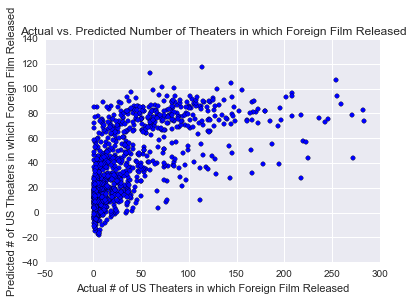

In [101]:
plt.scatter(y, lr.predict(X))
plt.xlim(xmax=300)
plt.title("Actual vs. Predicted Number of Theaters in which Foreign Film Released")
plt.xlabel('Actual # of US Theaters in which Foreign Film Released')
plt.ylabel('Predicted # of US Theaters in which Foreign Film Released')

In [102]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score, train_test_split, KFold
rf1 = RandomForestRegressor(n_estimators = 1000, max_features = 59)
# X_train_rf1, X_test_rf1, y_train_rf1, y_test_rf1 = train_test_split(X, y, test_size=0.3)
# kfold = KFold(len(X_train_rf), n_folds=10, shuffle=True)
# rf1.fit(X, y)
# rf2.score(X_test_rf1, y_test_rf1)
scores = cross_val_score(rf1, X, y, cv=10, scoring = 'r2')
scores.mean()

-5.3770471568791844

In [88]:
X = movie_allinfo8.iloc[:, 1:]
y = movie_allinfo8.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.linear_model import LassoCV

las = LassoCV(cv=10)
las.fit(X, y)
las.score(X_test, y_test)



0.4135383349350179

In [89]:
las.coef_

array([  0.1063197 ,   0.        ,  -0.        ,   0.        ,
        -0.        ,  -0.        ,  -0.        ,   0.        ,
         0.        ,  -0.        ,  56.26938688,   0.        ,
         0.        ,  -0.        ,  -2.29630291,   0.        ,
        -0.        ,  -0.59126626,  -0.        ,  -0.        ,
         0.        ,   0.        ,   0.        ,  -0.        ,
         0.        ,   0.        ,  -0.        ,   0.        ,
         4.74344831, -22.7977429 ,   0.        ,  -0.        ,
        -0.        ,   3.31672631,  -0.        ,   0.        ,
        -0.        ,  -0.        ,  -0.        ,   0.        ,
         2.91449008,  -0.29417723,  26.24778309,  -3.53885783,
         0.        ,   0.        ,  -0.        ,   0.        ,
         4.40430035,  -5.07161272,  -1.84437027,  -0.31768344,
        -0.        ,   0.        ,  -0.        ,  -0.        ,
         1.11006223,   7.21719559,   3.8749897 ])

In [90]:
pd.DataFrame(zip(movie_allinfo8.columns[1:], las.coef_[:])).sort_values(1, ascending=False)

,0,1
10,India,56.269387
42,Sony Classics,26.247783
57,November,7.217196
28,R,4.743448
48,February,4.404300
58,December,3.874990
33,Eros,3.316726
40,Music Box Films,2.914490
56,October,1.110062
0,runtime (mins),0.106320


In [91]:
movies_allinfo9=movie_allinfo8[['widest_release','India', 'Sony Classics', 'November', 'R', 'February', 'December', 'Eros', 'Music Box Films', 'October', 'runtime (mins)', 'Other Distributor', 'May', 'Other Country', 'April', 'Japan', 'Strand', 'March', 'Unrated']]

In [92]:
lr = LinearRegression()
X = movies_allinfo9.iloc[:, 1:]
y = movies_allinfo9.iloc[:,0]
lr = LinearRegression()
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [93]:
scores = cross_val_score(lr, X, y, cv=10, scoring = 'r2')
scores
scores.mean()

-3.885747843419888

In [98]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score, train_test_split, KFold
rf1 = RandomForestRegressor(n_estimators = 1000, max_features = 18)
# X_train_rf1, X_test_rf1, y_train_rf1, y_test_rf1 = train_test_split(X, y, test_size=0.3)
# kfold = KFold(len(X_train_rf), n_folds=10, shuffle=True)
# rf1.fit(X, y)
# rf2.score(X_test_rf1, y_test_rf1)
scores = cross_val_score(rf1, X, y, cv=10, scoring = 'r2')
scores.mean()

-5.4849307051741958

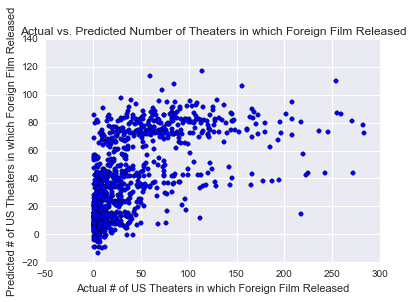

In [95]:
plt.scatter(y, lr.predict(X))
plt.xlim(xmax=300)
plt.title("Actual vs. Predicted Number of Theaters in which Foreign Film Released")
plt.xlabel('Actual # of US Theaters in which Foreign Film Released')
plt.ylabel("Predicted # of US Theaters in which Foreign Film Released")

In [96]:
lr = LinearRegression()
X = movies_allinfo9.iloc[:, 1:]
y = movies_allinfo9.iloc[:,0]
lr = LinearRegression()
lr.fit(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
rcv = RidgeCV(cv=10)

rcv.fit(X, y)
rcv.score(X_test, y_test)

0.29718463839468445